In [ ]:
! pip install kaggle # install kaggle library
! mkdir ~/.kaggle # make directory ".kaggle"
! cp kaggle.json ~/.kaggle/ # copy the json file into the directory
! chmod 600 ~/.kaggle/kaggle.json # allocate required permission for the file
! kaggle datasets download -d alessiocorrado99/animals10 # download animal set
! unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina',
             'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

In [ ]:
training_array = [] # For putting images and labels into one area

def create_training_array():
  source = '/content/raw-img'
  for folder in os.listdir(source): # Look at raw-img file
    folderPath = source + '/' + folder
    for img in os.listdir(folderPath): # Looking at folder in raw-img
      image_path = folderPath + "/" + img
      imgArr = cv2.imread(image_path) # read images
      imgArr = cv2.resize(imgArr,(224,224)) # Resize image to 224 x 224

      training_array.append([classes.index(folder), imgArr]) # Create [encoded label, image]

create_training_array()
random.shuffle(training_array) # shuffle the training array as the file extraction made the set organized by classes

gallina


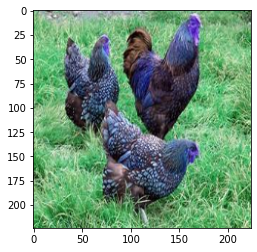

In [ ]:
index = 7000
print(classes[training_array[index][0]])
plt.imshow(training_array[index][1])

In [ ]:
X_train_full = []
y_train_full = []

for label, image in training_array:
  X_train_full.append(image)
  y_train_full.append(label)

X_train_full = np.array(X_train_full) # convert X_train_full to numpy array
y_train_full = np.array(y_train_full) # convert y_train_full to numpy array

In [ ]:
print(len(X_train_full))
print(len(y_train_full))

26179
26179


cavallo


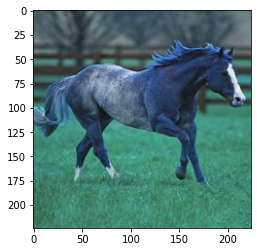

In [ ]:
index = 451
plt.imshow(X_train_full[index])
print(classes[y_train_full[index]])

In [ ]:
X_train, X_test = X_train_full[0:-2617], X_train_full[-2617:] 
y_train, y_test = y_train_full[0:-2617], y_train_full[-2617:]

gallina


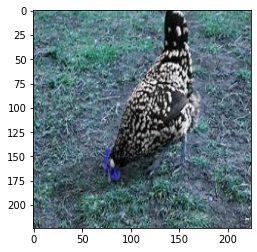

In [ ]:
index = random.randint(0, 5000)
plt.imshow(X_train[index])
print(classes[y_train[index]])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 64)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 35, epochs=30, validation_split=0.4)

Epoch 1/30
404/404 [==============================] - 63s 123ms/step - loss: 4.3354 - accuracy: 0.2877 - val_loss: 3.9406 - val_accuracy: 0.2283
Epoch 2/30
404/404 [==============================] - 47s 115ms/step - loss: 3.2097 - accuracy: 0.3918 - val_loss: 3.1509 - val_accuracy: 0.2820
Epoch 3/30
404/404 [==============================] - 47s 117ms/step - loss: 2.5712 - accuracy: 0.4393 - val_loss: 2.8793 - val_accuracy: 0.2976
Epoch 4/30
404/404 [==============================] - 48s 118ms/step - loss: 2.2147 - accuracy: 0.4839 - val_loss: 2.5320 - val_accuracy: 0.3955
Epoch 5/30
404/404 [==============================] - 48s 119ms/step - loss: 2.0465 - accuracy: 0.5172 - val_loss: 2.5100 - val_accuracy: 0.3506
Epoch 6/30
404/404 [==============================] - 48s 119ms/step - loss: 1.9564 - accuracy: 0.5439 - val_loss: 2.0123 - val_accuracy: 0.5116
Epoch 7/30
404/404 [==============================] - 48s 120ms/step - loss: 1.8793 - accuracy: 0.5780 - val_loss: 2.0993 - val_ac

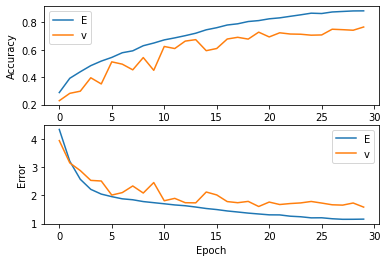

In [ ]:
fig, axes = plt.subplots(2)

# accuracy subplots
axes[0].plot(history.history['accuracy'], label='train accuracy')
axes[0].plot(history.history['val_accuracy'], label='valuation accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].legend('lower right')
axes[0].legend('Evaluation Accuracy')

# accuracy subplots
axes[1].plot(history.history['loss'], label='train error')
axes[1].plot(history.history['val_loss'], label='valuation error')
axes[1].set_ylabel('Error')
axes[1].set_xlabel('Epoch')
axes[1].legend('lower right')
axes[1].legend('Evaluation Error')

plt.show()

In [ ]:
score = model.evaluate(X_test,y_test)

82/82 [==============================] - 3s 31ms/step - loss: 1.5578 - accuracy: 0.7753


In [ ]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.87, 0.  , 0.  , 0.  , 0.  , 0.13, 0.  ],
       [0.04, 0.02, 0.75, 0.  , 0.01, 0.01, 0.03, 0.08, 0.  , 0.06],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.  ],
       [0.02, 0.69, 0.01, 0.01, 0.01, 0.  , 0.05, 0.21, 0.01, 0.01],
       [0.23, 0.03, 0.01, 0.01, 0.  , 0.65, 0.01, 0.03, 0.  , 0.03],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.09, 0.01, 0.  , 0.  , 0.  , 0.83, 0.05, 0.  , 0.  ],
       [0.11, 0.01, 0.  , 0.74, 0.02, 0.01, 0.02, 0.  , 0.06, 0.03],
       [0.11, 0.01, 0.  , 0.02, 0.03, 0.02, 0.01, 0.02, 0.77, 0.02]],
      dtype=float32)

In [ ]:
y_new = y_test[:10]
y_new

array([3, 2, 0, 8, 6, 5, 7, 6, 9, 9])

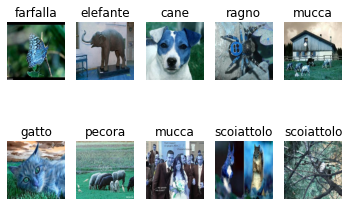

In [ ]:
plt.figure()
for index, image in enumerate(X_new):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(classes[y_test[index]], fontsize=12)
plt.show()